# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [39]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("dataset/penguins.csv")

# Exploring Dataset
Explore Dataset columns and variables data types and check for missing data; In addition to running some summary statistics to check for the presence of outliers and know the distribution of data.


In [40]:
# C1
#-----
# Exploring Dataset
#--------------------------
display(penguins_df.head())
penguins_df.info()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [41]:
# C2
#-------
# Summary statistics
#-----------------------
display(penguins_df.describe())
penguins_df["sex"].value_counts(normalize = True, dropna=False)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


MALE      0.491279
FEMALE    0.479651
NaN       0.026163
.         0.002907
Name: sex, dtype: float64

array([[<AxesSubplot:title={'center':'culmen_length_mm'}>,
        <AxesSubplot:title={'center':'culmen_depth_mm'}>],
       [<AxesSubplot:title={'center':'flipper_length_mm'}>,
        <AxesSubplot:title={'center':'body_mass_g'}>]], dtype=object)

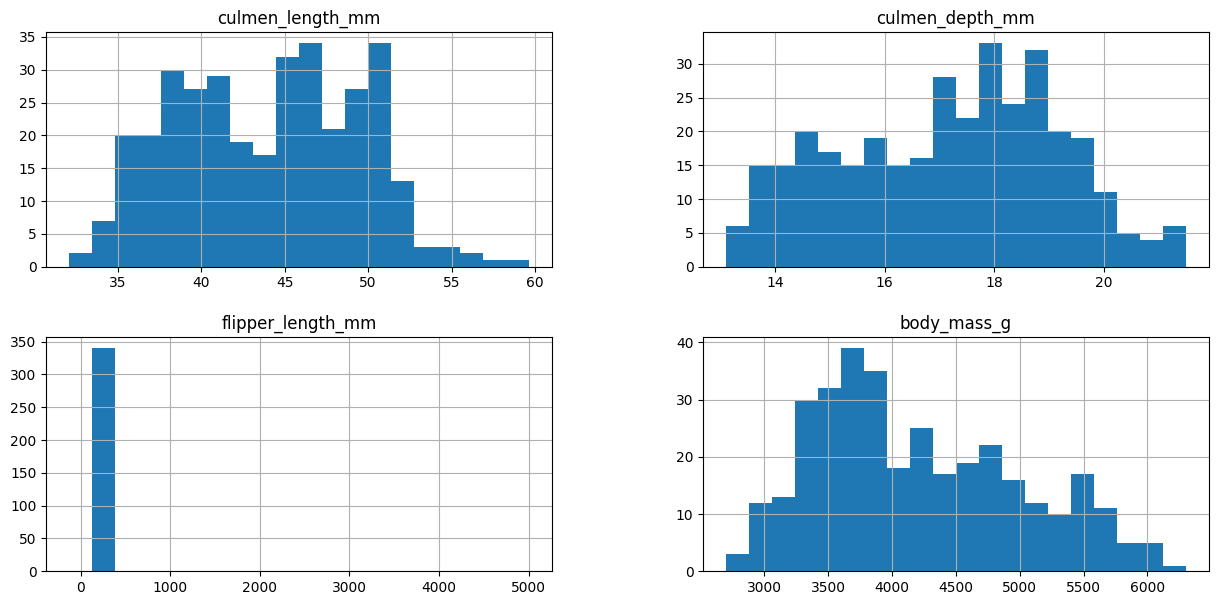

In [58]:
# C3
#------
# Histogram to visualize data distribution for numerical variables
#----------------------------------------------------------------------
penguins_df.select_dtypes("number").hist(bins=20, figsize=(15,7))

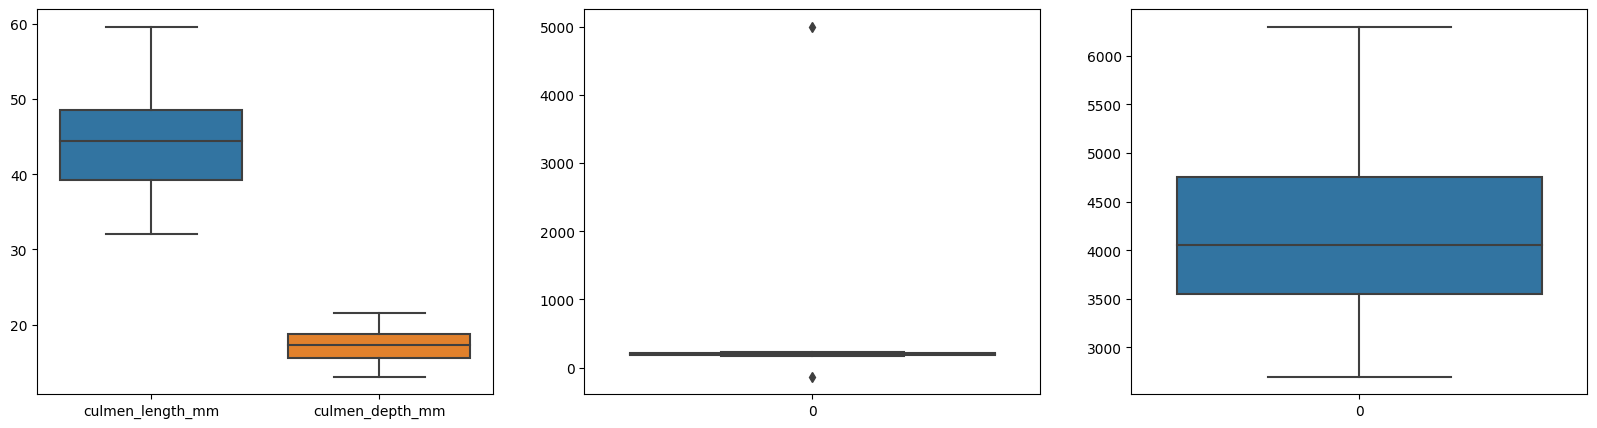

In [54]:
# C4
#------
# Box plot to visualize data distribution for numerical variables and visualize outliers
#-----------------------------------------------------------------------------------------
fig, ax = plt.subplots(1,3)
sns.boxplot(data = penguins_df.iloc[:,:2], ax=ax[0])
sns.boxplot(data = penguins_df.iloc[:,2], ax=ax[1])
sns.boxplot(data = penguins_df.iloc[:,3], ax=ax[2])
fig.set_size_inches(20,5)

# Data Cleaning
In this Step, I will eliminate the missing data and outliers

In [44]:
# C5
#-----
# Removing missing values
#----------------------------
penguins_clean = penguins_df.dropna()

In [45]:
# C6
#-----
# Removing outliers from "flipper_length_mm" column
#----------------------------------------------------
from scipy.stats import iqr
lower_flipper = penguins_clean["flipper_length_mm"].quantile(0.25) - iqr(penguins_clean["flipper_length_mm"])*1.5

upper_flipper = penguins_clean["flipper_length_mm"].quantile(0.75) + iqr(penguins_clean["flipper_length_mm"])*1.5

drop_indices = penguins_clean.query("flipper_length_mm > @upper_flipper or flipper_length_mm < @lower_flipper").index

penguins_clean.drop(drop_indices, inplace = True)

c:\Users\moham\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Data Preprocessing
In this step, I will preprocess data by standardizing data and one hot encoding for the categorical column.

In [46]:
# C7
#-----
# One-Hot-Encoding
#--------------------
penguins_preprocessed = pd.get_dummies(penguins_clean,drop_first=True)
penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1


In [47]:
# C8
#-----
# Standardizing the data
#--------------------------
scaler = StandardScaler()
penguins_preprocessed = scaler.fit_transform(penguins_preprocessed)

# Dimention Recduction
In this step, I will perform dimention reduction via PCA on the dataset to determine the desired number of components.

<AxesSubplot:>

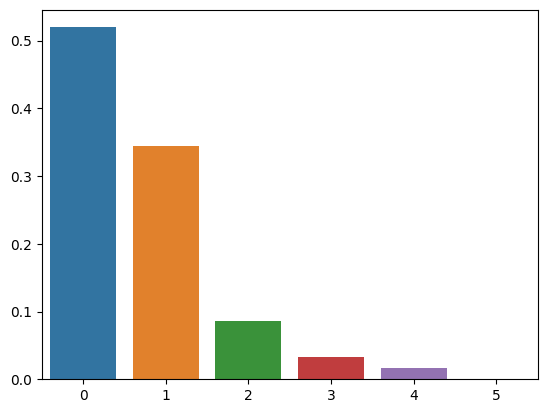

In [48]:
# C9
#-----
# PCA to determine the variance in each feature
#----------------------------------------------------
pca = PCA()
pca.fit_transform(penguins_preprocessed)
features_variances_ratios = pca.explained_variance_ratio_
sns.barplot(x=list(range(pca.n_components_)), y=features_variances_ratios)

In [49]:
# C10
#-------
# PCA -> 3 components
#---------------------------
n_components = sum((features_variances_ratios)>0.1)
pca_model = PCA(n_components=n_components)
penguins_PCA = pca_model.fit_transform(penguins_preprocessed)

# Clustering With KMeans

<AxesSubplot:>

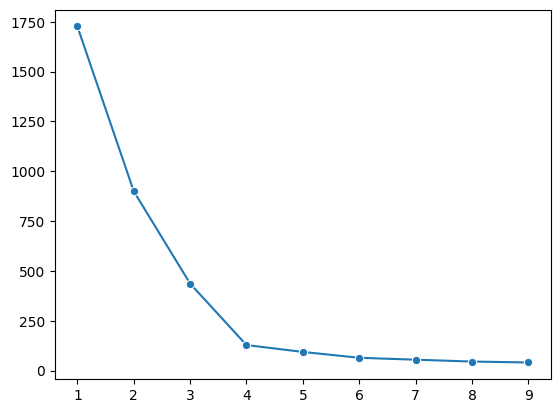

In [50]:
# C11
#-----
# Deciding the optimal number of clusters
#---------------------------------------------
inertia = []
for i in range(1,10):
    kmeans_model_trial = KMeans(n_clusters=i, random_state=42)
    kmeans_model_trial.fit(penguins_PCA)
    inertia.append(kmeans_model_trial.inertia_)
sns.lineplot(x=range(1,10), y=inertia, marker='o')

<AxesSubplot:>

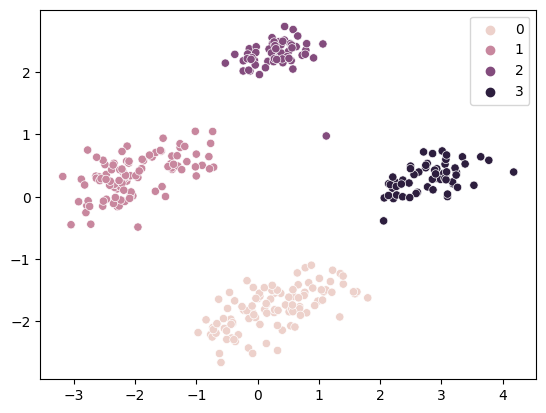

In [51]:
# C12
#------
# KMeans model with 4 clusters
#--------------------------------
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state=42)
kmeans.fit(penguins_PCA)
labels = kmeans.labels_
sns.scatterplot(x=penguins_PCA[:,0], y=penguins_PCA[:,1], hue = labels)

In [52]:
# C13
#-----
# Adding the labels to the dataframe
#----------------------------------------
penguins_clean["label"] = labels
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g','label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins

c:\Users\moham\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,40.217757,17.611215,189.046729,3419.158879
2,45.545763,14.262712,212.779661,4683.050847
3,49.473770,15.718033,221.540984,5484.836066
